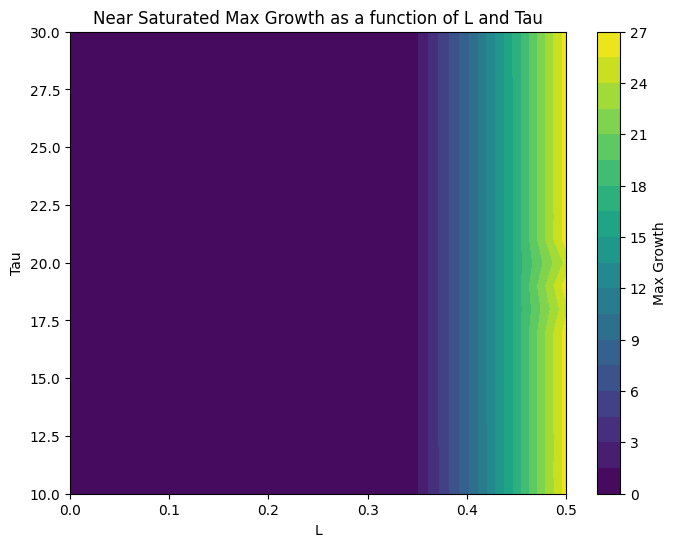

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

# Define L and tau values
L_values = np.arange(0.0, 0.55, 0.05)
tau_values = np.arange(10, 31, 1)

# Initialize a 2D array to store max_growth values
max_growth_matrix = np.zeros((len(tau_values), len(L_values)))

# Loop through the netCDF files and extract 'max_growth' values
for i, tau in enumerate(tau_values):
    for j, L in enumerate(L_values):
        L = np.round(L, 2)
        tau = np.round(tau, 2)
        filename = f"/mnt/winds/data2/gmsarro/Rossbypalloza_project_22/LWA/run_LWA/Moist_growth/results/growth_L_{L}_tau_{tau}.nc"
        try:
            # Open the netCDF file
            dataset = nc.Dataset(filename)
            # Extract the 'max_growth' variable
            max_growth = dataset.variables['max_growth'][:]
            max_growth_matrix[i, j] = max_growth
            dataset.close()
        except FileNotFoundError:
            # If the file is not found, set the value to NaN
            max_growth_matrix[i, j] = np.nan

# Plotting
L, tau = np.meshgrid(L_values, tau_values)
plt.figure(figsize=(8, 6))
plt.contourf(L, tau, max_growth_matrix, levels=20, cmap="viridis")
plt.colorbar(label="Max Growth")
plt.xlabel("L")
plt.ylabel("Tau")
plt.title("Near Saturated Max Growth as a function of L and Tau")
plt.show()

max_growth_matrix_sat = np.copy(max_growth_matrix)

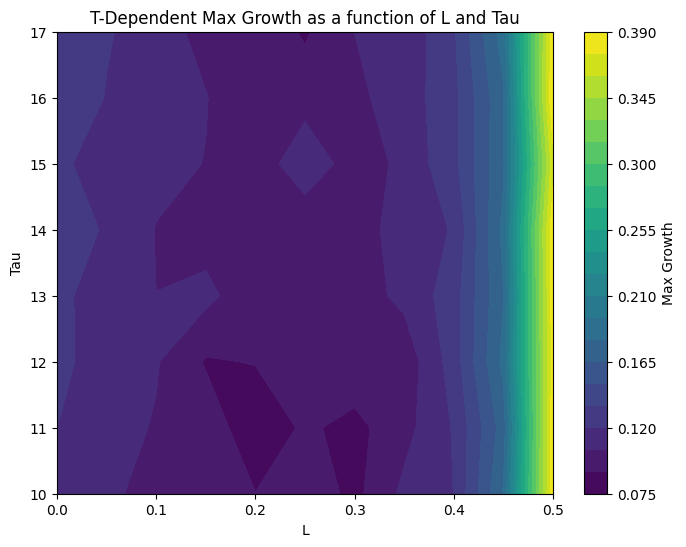

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

# Define L and tau values
L_values = np.arange(0.0, 0.55, 0.05)
tau_values = np.arange(10, 18, 1)

# Initialize a 2D array to store max_growth values
max_growth_matrix = np.zeros((len(tau_values), len(L_values)))

# Loop through the netCDF files and extract 'max_growth' values
for i, tau in enumerate(tau_values):
    for j, L in enumerate(L_values):
        L = np.round(L, 2)
        tau = np.round(tau, 2)
        filename = f"/mnt/winds/data2/gmsarro/Rossbypalloza_project_22/LWA/run_LWA/Moist_growth/results/Non_sat_growth_L_{L}_tau_{tau}.nc"
        try:
            # Open the netCDF file
            dataset = nc.Dataset(filename)
            # Extract the 'max_growth' variable
            max_growth = dataset.variables['max_growth'][:]
            max_growth_matrix[i, j] = max_growth
            dataset.close()
        except FileNotFoundError:
            # If the file is not found, set the value to NaN
            max_growth_matrix[i, j] = np.nan

# Plotting
L, tau = np.meshgrid(L_values, tau_values)
plt.figure(figsize=(8, 6))
plt.contourf(L, tau, max_growth_matrix, levels=20, cmap="viridis")
plt.colorbar(label="Max Growth")
plt.xlabel("L")
plt.ylabel("Tau")
plt.title("T-Dependent Max Growth as a function of L and Tau")
plt.show()

/tmp/ipykernel_22062/3236620054.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


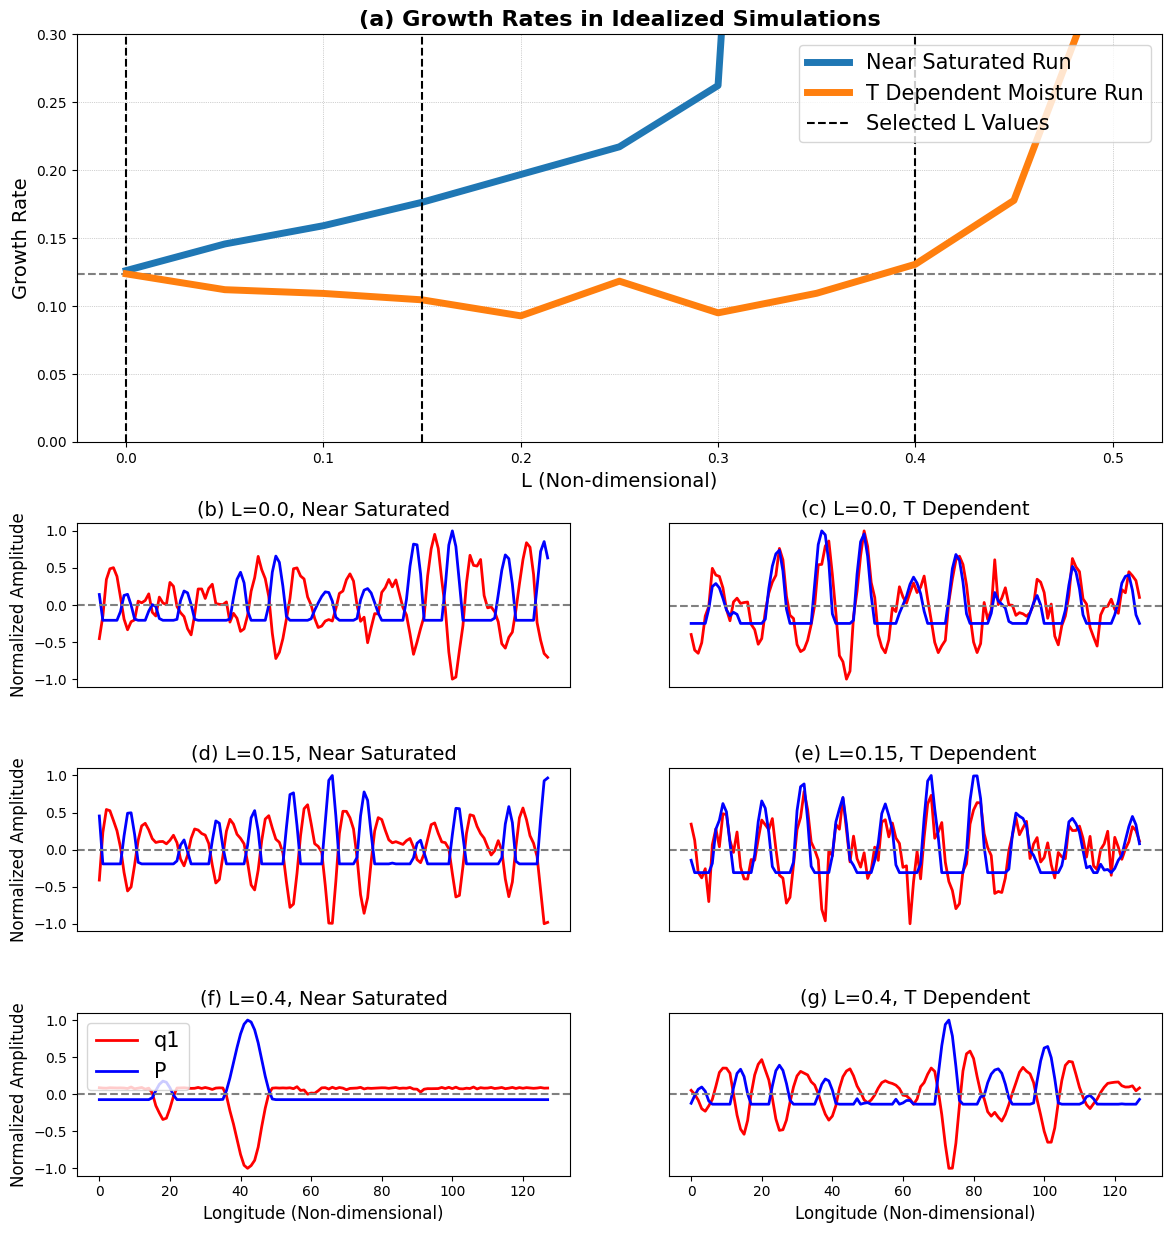

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc

def laplacian(f, dx):
    return (np.roll(f, -1) - 2 * f + np.roll(f, 1)) / dx**2

# Create a figure with a grid layout
fig = plt.figure(figsize=(14, 18))
grid = plt.GridSpec(6, 2, hspace=0.5, wspace=0.2)

# Large plot on top
ax_main = fig.add_subplot(grid[:2, :])
ax_main.axhline(max_growth_matrix[5, 0], color='gray', linestyle='--')
ax_main.axvline(0, color='black', linestyle='--')
ax_main.axvline(0.4, color='black', linestyle='--')
ax_main.plot(L_values, max_growth_matrix_sat[5, :], linewidth=5, label='Near Saturated Run')
ax_main.plot(L_values, max_growth_matrix[5, :], linewidth=5, label='T Dependent Moisture Run')
ax_main.axvline(0.15, color='black', linestyle='--', label='Selected L Values')
ax_main.set_xlabel('L (Non-dimensional)', fontsize=14)
ax_main.set_ylabel('Growth Rate', fontsize=14)
ax_main.set_ylim(0., 0.3)
ax_main.grid(color='gray', linestyle=':', linewidth=0.5, alpha=0.7)
ax_main.set_title('(a) Growth Rates in Idealized Simulations', fontsize=16, fontweight='bold')
ax_main.legend(fontsize=15, loc='upper right')

# Smaller plots below
titles = [
    '(b) L=0.0, Near Saturated', '(c) L=0.0, T Dependent',
    '(d) L=0.15, Near Saturated', '(e) L=0.15, T Dependent',
    '(f) L=0.4, Near Saturated', '(g) L=0.4, T Dependent'
]

files = [
    'growth_L_0.0_tau_15.nc', 'Non_sat_growth_L_0.0_tau_15.nc',
    'growth_L_0.15_tau_15.nc', 'Non_sat_growth_L_0.15_tau_15.nc',
    'growth_L_0.4_tau_15.nc', 'Non_sat_growth_L_0.4_tau_15.nc'
]

for i, title in enumerate(titles):
    filename = f"/mnt/winds/data2/gmsarro/Rossbypalloza_project_22/LWA/run_LWA/Moist_growth/results/{files[i]}"
    dataset = nc.Dataset(filename)
    P_at_max_growth = dataset.variables['P_at_max_growth'][:]
    Psi_1_at_max_growth = dataset.variables['Psi_1_at_max_growth'][:]
    Psi_2_at_max_growth = dataset.variables['Psi_2_at_max_growth'][:]

    Lx = 72.  # Size of x
    Nx = 128  # Number of grid points
    dx = Lx / Nx
    Ld = 1  # Deformation radius

    q1 = laplacian(Psi_1_at_max_growth, dx) - (Psi_1_at_max_growth - Psi_2_at_max_growth) / Ld**2

    ax = fig.add_subplot(grid[2 + i // 2, i % 2])
    ax.plot(q1 / np.max(np.abs(q1)), label="q1", color='red', linewidth=2)
    ax.plot(P_at_max_growth / np.max(np.abs(P_at_max_growth)), label="P", color='blue', linewidth=2)
    ax.set_title(title, fontsize=14)
    ax.axhline(0, color='gray', linestyle='--')

    if i % 2 == 0:        
        ax.set_ylabel('Normalized Amplitude', fontsize=12)
    if i == 4 or i == 5:
        ax.set_xlabel('Longitude (Non-dimensional)', fontsize=12)

    if i == 4:
        ax.legend(fontsize=15, loc='upper left')
    if i % 2 != 0: 
        ax.set_yticks([])

    if i < 4: 
        ax.set_xticks([])

# Adjust layout and display the figure
plt.tight_layout()
plt.show()
